# House Prices: Advanced Regression Techniques - Data Preprocessing Lab


In this lab, we will work with the Kaggle **House Prices: Advanced Regression Techniques** dataset.  
We will cover:
1. Reading the dataset  
2. Exploratory Data Analysis (EDA)  
3. Handling Missing Values  
4. Encoding Categorical Variables  
5. Detecting & Removing Outliers (Z-score and IQR methods)  
6. Feature Selection using Correlation  
7. Dimensionality Reduction using PCA  

This will give you a complete hands-on workflow for preparing data for machine learning.


## Task 1: Reading the Dataset
Read the dataset using Pandas with default indexing. 

In [3]:

import pandas as pd

# Write your code below
df=pd.read_csv('house_train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 2: Exploratory Data Analysis (EDA)
We check basic statistics and visualize missing values, distributions, etc.

In [45]:

# Basic info
print(df.info())
# Find the missing values
print(df.isnull().sum())
# Find the statistical data analysis on the data
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Step 3: Handling Missing Values
We can fill missing numeric values with median and categorical with mode.

In [55]:

# Fill numeric columns with median
numericColumns=df.select_dtypes(include=['int64','float64']).columns

for col in numericColumns:
    df[col].fillna(df[col].median(),inplace=True)





# Fill categorical columns with mode

categoryColumns=df.select_dtypes(include=['object']).columns

for col in categoryColumns:
    df[col].fillna(df[col].mode()[0],inplace=True) #.mode returns list in sequence

print(df.isnull().sum().sum())






0


## Step 4: Encoding Categorical Variables
Convert categorical (string) values into numbers using Label Encoding and One-Hot Encoding.

In [77]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

categoryColumns=df.select_dtypes(include=['object']).columns

labelEncodedDF=df.copy()

for col in categoryColumns:
    labelEncodedDF[col]=le.fit_transform(labelEncodedDF[col])

oneHotEncodedDF=pd.get_dummies(df,columns=categoryColumns,drop_first=True)
#dropfirst is used for space efficiency, it stops from making useless columns (not necessary columns)

# print(df.head())
# print(labelEncodedDF.head())
# print(oneHotEncodedDF.head())


# df.head()


In [79]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [81]:
labelEncodedDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000


In [83]:
oneHotEncodedDF.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False


## Step 5: Outlier Detection
Use Z-scores to find outliers 

In [5]:

# use Z score to identify outliers display the rows having outliers but do not remove them for now. 


Original shape: (1460, 247)
After removing outliers (Z-score): (1438, 247)


## Step 6: Outlier Detection and Removal (IQR)
We use IQR to detect and remove outliers.

In [6]:

# Us from scratch IQR method to identify and remove outliers. Please make comparative study between
# z-score and IQR in identifying better method for identification of outliers on our dataset. 


Original shape: (1460, 247)
After removing outliers (IQR): (1399, 247)


## Step 7: Feature Selection using Correlation
We check correlation with the target variable `SalePrice`. Variables with high correlation are more predictive.

<AxesSubplot:>

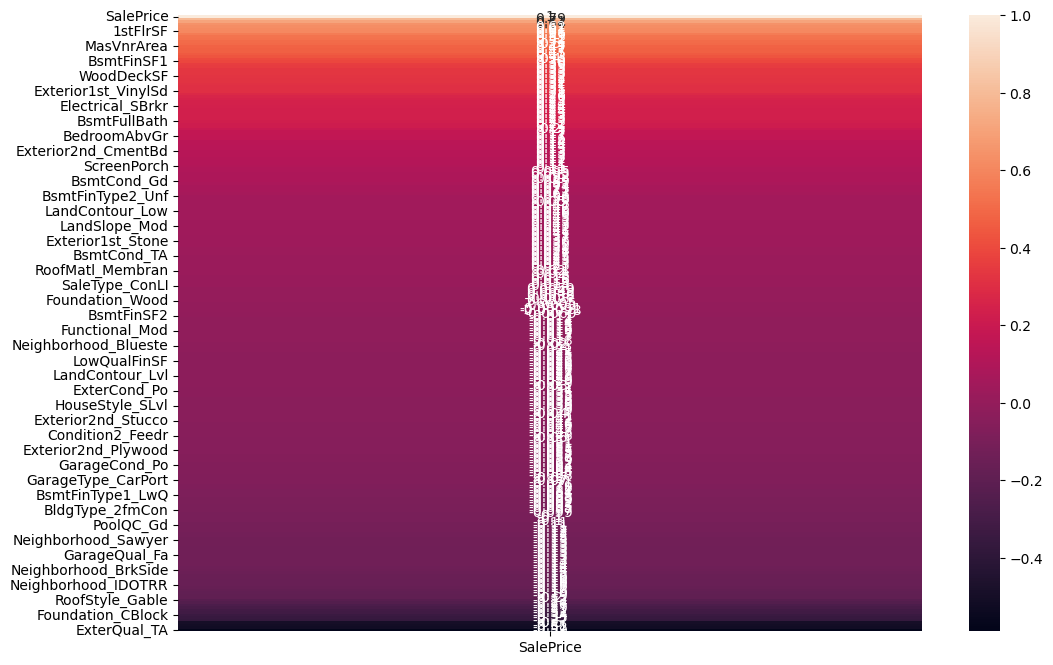

In [7]:
# Take SalePrice as a reference column and find 10 of the most highest correlated columns to price. 
# For Machine Learning purposes and draw their heatmap. 


## Step 8: Dimensionality Reduction using PCA
We use Principal Component Analysis (PCA) to reduce dimensionality.

In [8]:
# Reduce the dimensions of the data using PCA. Convert the columns into two prinicple component only. 


Explained variance ratio: [0.06570667 0.03072798 0.02413629 0.02086441 0.01669638 0.01580965
 0.01473696 0.01362927 0.01356515 0.01227657]
